### Tutorial

Here I will reproduce in Python the R code tutorial found at https://repos.cosmos.esa.int/socci/projects/GAIA/repos/astrometry-inference-tutorials/browse/single-source/tutorial/Distance%20inference%20-%20single%20source.ipynb?at=2c11dda5bf13cf0a52ce4f9c2eb586c83abf9cb8 
using Bailer-Jones 2015 as the reference (https://arxiv.org/pdf/1507.02105.pdf)

### Set priors
3 priors for distance likelihoods:

1 - uniform in distance:
\begin{equation*}
P(r)   = \frac{1}{r_{lim}} \; for \; 0<r\leq r_{lim}
\end{equation*}

2 - uniform space density of stars:
\begin{equation*}
P(r)   = \frac{3}{r^{3}_{lim}}r^{2} \; for \; 0<r\leq r_{lim}
\end{equation*}

3 - exponentially decreasing space density:
\begin{equation*}
P(r)   = \frac{1}{L^{3}} r^{2} e^{-\frac{r}{L}} \; for \; 0<r
\end{equation*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
rlim = 1e3
# 1 - Uniform prior:
pr1 = np.random.uniform(0,rlim,1e5)

In [84]:
# 2 - Uniform space density prior:

# Define PDF:
class pr2_pdf(st.rv_continuous):
    def _pdf(self,x):
        return np.piecewise(x, [x < 0, x >= 0], [lambda r: 0, lambda r: (3/(rlim**3))*x**2])

# Create continuous random variable:
pr2_cv = pr2_pdf(a=0, b=1e3, name='pr2_pdf')

# Draw 1e5 samples from distribution:
pr2 = pr2_cv.rvs(size=100000)
print pr2.shape

(100000,)


In [96]:
# 3 - Exponentially decreasing space density prior:

# Define the scale length:
L = 1.35e3
# Astraatmadja & Bailer-Jones 2016 found the optimum galactic scale length to be 1.35 kpc

# Define PDF:
class pr3_pdf(st.rv_continuous):
    def _pdf(self,x):
        return np.piecewise(x, [x < 0, x >= 0], [lambda r: 0, lambda r: ((x**2)/(L**3))*np.exp(-x/L)])

# Create continuous random variable:
pr3_cv = pr3_pdf(a=0, b=np.inf, name='pr3_pdf')

# Draw 1e5 samples from distribution:
pr3 = pr3_cv.rvs(size=100000)
print pr3.shape

(100000,)


In [108]:
t1 = time.time()
ppr3 = np.array([])
for i in range(1000):
    ppr33 = pr3_cv.rvs(size=1)
    ppr3 = np.append(ppr3,ppr33)

t2 = time.time()

print t1-t0,t2-t1

448.194870949 18.560256958


<IPython.core.display.Javascript object>


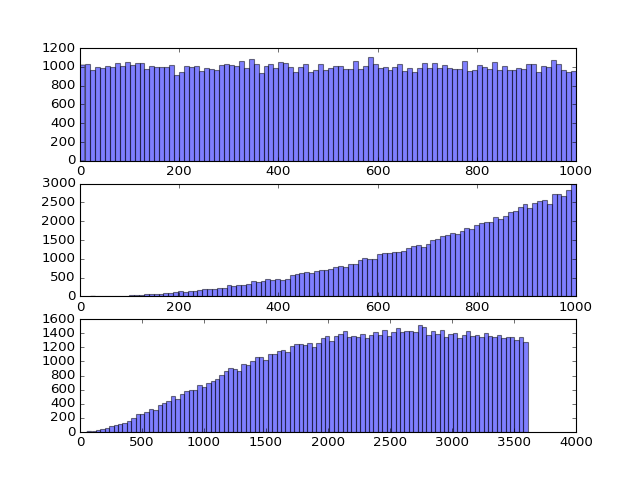

In [97]:
%matplotlib notebook
plt.subplot(311)
plt.hist(pr1,bins=100,alpha=0.5)
plt.subplot(312)
plt.hist(pr2,bins=100,alpha=0.5)
plt.subplot(313)
plt.hist(pr3,bins=100,alpha=0.5)
plt.show()

In [ ]:
# Uniform space density prior:

r = np.linspace(0, rlim, 1e5)
# Define the probability density function:
pr2 = np.piecewise(r, [r < 0, r >= 0], [lambda r: 0, lambda r: (3/(rlim**3))*r**2])/100
print np.max(pr2)
print np.sum(pr2)

def p2(x):
     return np.piecewise(x, [x < 0, x >= 0], [lambda r: 0, lambda r: (3/(rlim**3))*x**2])/100

print p2(100)
print 'rand',np.random.uniform(0,1e3,1)

# Rejection sampling:
def rejection_sampler(p,xbounds,pmax):
    arr = np.array([])
    num=0
    while num<=1e5:
        num=num+1
        x = np.random.rand(1)*(xbounds[1]-xbounds[0])+xbounds[0]
        #print p(x)
        y = np.random.uniform(0,1,1)
        #print y
        if y<=p(x):
            #return x
            arr = np.append(arr,x)
    return arr   

#pr2=rejection_sampler(p2,(0,1e3),0.003)
#print pr2.shape